In [442]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib as ta
import bt

In [443]:
volumes = pd.read_csv('Data/stock_volumes.csv', index_col = 'date', parse_dates = True)
prices = pd.read_csv('Data/stock_prices.csv', index_col = 'date', parse_dates = True)
info = pd.read_csv('Data/stock_info.csv')
sp_listings = pd.read_csv('Data/sp500_listings.csv')                   

In [444]:
#7,914 monthly periods and 1,242 stocks
print(f'volumes df shape: {volumes.shape}\nprices df shape: {prices.shape}')

volumes df shape: (7914, 1241)
prices df shape: (7914, 1241)


In [445]:
#188,872 listings in total
print(f'sp_listings df shape: {sp_listings.shape}')

sp_listings df shape: (188872, 2)


In [446]:
info[info['ESTAT'] == 'ACT.']

,Instrument,MNEM,RIC,ISIN,NAME,ESTAT
4,916328,U:ABT,ABT,US0028241000,ABBOTT LABORATORIES,ACT.
6,936365,@AMD,AMD.O,US0079031078,ADVANCED MICRO DEVICES,ACT.
10,905271,U:APD,APD,US0091581068,AIR PRDS.& CHEMS.,ACT.
14,905113,U:HWM,HWM,US4432011082,HOWMET AEROSPACE,ACT.
18,905802,U:HES,HES,US42809H1077,HESS,ACT.
...,...,...,...,...,...,...
1236,131745,@PENN,PENN.O,US7075691094,PENN NAT.GAMING,ACT.
1237,69487D,@NXPI,NXPI.O,NL0009538784,NXP SEMICONDUCTORS,ACT.
1238,68157P,U:GNRC,GNRC.K,US3687361044,GENERAC HOLDINGS,ACT.
1239,9110RA,@CZR,CZR.O,US12769G1004,CAESARS ENTERTAINMENT,ACT.


In [447]:
prices.head()

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9889RL,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,22.75,12.63,30.00,29.61,3.8736,11.00,4.1250,24.50,58.00,19.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,22.56,12.57,31.50,29.37,3.8876,11.00,4.0000,24.50,57.75,18.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,22.38,12.41,32.25,28.89,3.8806,11.38,3.9375,24.63,57.88,18.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,21.81,12.60,32.13,28.41,3.8387,11.50,3.8125,24.75,57.50,18.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,22.25,12.49,32.13,29.13,3.8387,11.50,3.8125,25.00,57.75,19.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-448-c1e325f5d8b3>:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


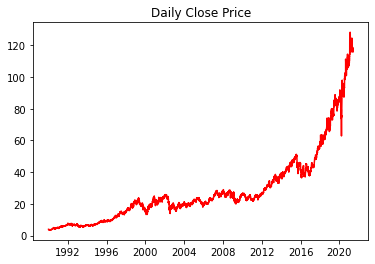

In [448]:
plt.plot(prices['916328'], color = 'red')
plt.title("Daily Close Price")
plt.show()

In [449]:
#Data frame to hold returns
daily_returns = prices.copy(deep = True)

#Convert prices into daily returns
for col in daily_returns.columns:
    daily_returns[col] = daily_returns[col].pct_change()*100

In [450]:
prices.head()

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9889RL,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,22.75,12.63,30.00,29.61,3.8736,11.00,4.1250,24.50,58.00,19.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,22.56,12.57,31.50,29.37,3.8876,11.00,4.0000,24.50,57.75,18.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,22.38,12.41,32.25,28.89,3.8806,11.38,3.9375,24.63,57.88,18.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,21.81,12.60,32.13,28.41,3.8387,11.50,3.8125,24.75,57.50,18.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,22.25,12.49,32.13,29.13,3.8387,11.50,3.8125,25.00,57.75,19.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [451]:
daily_returns.head()

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9889RL,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,-0.835165,-0.475059,5.000000,-0.810537,0.361421,0.000000,-3.030303,0.000000,-0.431034,-1.315789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,-0.797872,-1.272872,2.380952,-1.634321,-0.180060,3.454545,-1.562500,0.530612,0.225108,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,-2.546917,1.531023,-0.372093,-1.661475,-1.079730,1.054482,-3.174603,0.487211,-0.656531,-1.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,2.017423,-0.873016,0.000000,2.534319,0.000000,0.000000,0.000000,1.010101,0.434783,3.405405,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [452]:
#Resample to weekly
weekly_returns = prices.resample('W').mean()

#Convert prices into weekly returns
for col in weekly_returns.columns:
    weekly_returns[col] = weekly_returns[col].pct_change()*100

In [453]:
weekly_returns.head()

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9889RL,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-14,-2.176536,-4.592711,2.167143,-2.043344,-1.896709,0.285205,-3.622047,0.841634,-1.828408,-2.378667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-21,-0.849781,-1.285905,-2.724558,-4.860233,-1.693567,-5.545681,-0.980392,-1.516007,-5.285054,-4.927885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-28,3.160999,1.184233,-11.740632,-4.709877,-1.761860,-4.704554,-0.990099,-4.396954,-7.400238,-0.436731,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-04,1.170270,-4.698211,0.449210,-4.315153,-0.877093,-1.481043,-3.666667,3.537170,-0.253256,1.743045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


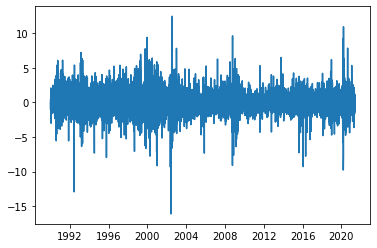

In [454]:
plt.plot(daily_returns['916328'])

<ipython-input-455-ef4fe0dce221>:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


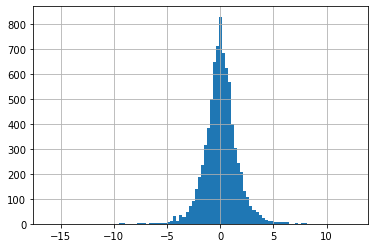

In [455]:
daily_returns['916328'].hist(bins=100)
plt.show()

In [456]:
# # Define the strategy
# bt_strategy = bt.Strategy('Trade_Weekly',    
#                           [bt.algos.RunWeekly(), # Run weekly  
#                            bt.algos.SelectAll(), # Use all data   
#                            bt.algos.WeighEqually(), # Maintain equal weights                
#                            bt.algos.Rebalance()]) # Rebalance

# # Create a backtest
# bt_test = bt.Backtest(bt_strategy, prices.loc[:,['916328','68157P']])

# # Run the backtest
# bt_res = bt.run(bt_test)

# # Plot the result
# bt_res.plot(title="Backtest result")

# # Get trade details
# bt_res.get_transactions()

In [481]:
active_stocks = info[info['ESTAT'] == 'ACT.']
active_stocks[active_stocks["MNEM"].str.contains("AMD", na = False)]

,Instrument,MNEM,RIC,ISIN,NAME,ESTAT
6,936365,@AMD,AMD.O,US0079031078,ADVANCED MICRO DEVICES,ACT.


In [482]:
amd = pd.DataFrame(prices['936365']).loc['2020-05-1':'2021-05-31']
amd = amd.dropna()
amd.columns = ['close_price']
amd

,close_price
date,
2020-05-01,49.88
2020-05-04,52.56
2020-05-05,52.19
2020-05-06,52.16
2020-05-07,51.95
...,...
2021-05-24,77.44
2021-05-25,77.86
2021-05-26,78.34


### SMAs

In [483]:
# Calculate two SMAs
amd['SMA_10'] = ta.SMA(amd['close_price'], timeperiod=10)
amd['SMA_50'] = ta.SMA(amd['close_price'], timeperiod=50)

# Print the last five rows
amd.tail()

,close_price,SMA_10,SMA_50
date,,,
2021-05-24,77.44,75.714,79.3808
2021-05-25,77.86,75.817,79.2880
2021-05-26,78.34,76.187,79.1998
2021-05-27,78.42,76.720,79.1156
2021-05-28,80.08,77.269,79.1548


<ipython-input-484-b6e13b21bbd9>:14: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


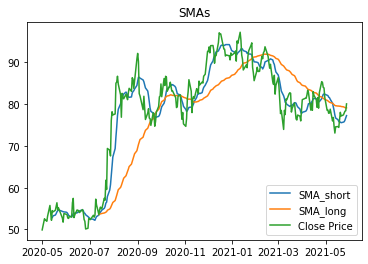

In [484]:
import matplotlib.pyplot as plt

# Plot SMA with the price
plt.plot(amd['SMA_10'],  
         label='SMA_short')
plt.plot(amd['SMA_50'],  
         label='SMA_long')
plt.plot(amd['close_price'],          
         label='Close Price')

# Customize and show the plot
plt.legend()
plt.title('SMAs')
plt.show()

### EMAs

In [485]:
# Calculate two EMAs
amd['EMA_10'] = ta.EMA(amd['close_price'], timeperiod=10)
amd['EMA_50'] = ta.EMA(amd['close_price'], timeperiod=50)

# Print the last five rows
amd.tail()

,close_price,SMA_10,SMA_50,EMA_10,EMA_50
date,,,,,
2021-05-24,77.44,75.714,79.3808,76.692233,79.621325
2021-05-25,77.86,75.817,79.2880,76.904554,79.552254
2021-05-26,78.34,76.187,79.1998,77.165544,79.504714
2021-05-27,78.42,76.720,79.1156,77.393627,79.462177
2021-05-28,80.08,77.269,79.1548,77.882059,79.486405


<ipython-input-486-3c2d243a21d0>:14: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


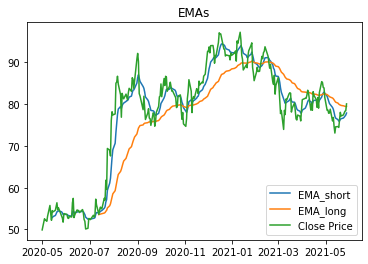

In [486]:
import matplotlib.pyplot as plt

# Plot SMA with the price
plt.plot(amd['EMA_10'],  
         label='EMA_short')
plt.plot(amd['EMA_50'],  
         label='EMA_long')
plt.plot(amd['close_price'],          
         label='Close Price')

# Customize and show the plot
plt.legend()
plt.title('EMAs')
plt.show()

### RSI

In [487]:
# Calculate RSI
amd['RSI'] = ta.RSI(amd['close_price'], timeperiod=14)

# Print the last five rows
amd.tail()

,close_price,SMA_10,SMA_50,EMA_10,EMA_50,RSI
date,,,,,,
2021-05-24,77.44,75.714,79.3808,76.692233,79.621325,48.164747
2021-05-25,77.86,75.817,79.2880,76.904554,79.552254,49.412595
2021-05-26,78.34,76.187,79.1998,77.165544,79.504714,50.868306
2021-05-27,78.42,76.720,79.1156,77.393627,79.462177,51.120764
2021-05-28,80.08,77.269,79.1548,77.882059,79.486405,56.155186


<ipython-input-488-e59da4136c60>:13: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


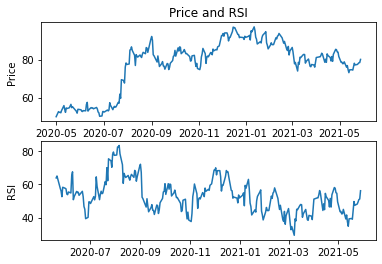

In [488]:
import matplotlib.pyplot as plt

# Create subplots
fig, (ax1, ax2) = plt.subplots(2)

# Plot RSI with the price
ax1.set_ylabel('Price')
ax1.plot(amd['close_price'])
ax2.set_ylabel('RSI')
ax2.plot(amd['RSI'])

ax1.set_title('Price and RSI')
plt.show()

### Bollinger Bands

In [465]:
# Define the Bollinger Bands
upper, mid, lower = ta.BBANDS(amd['close_price'], 
                                 nbdevup=2,     
                                 nbdevdn=2,        
                                 timeperiod=20)

<ipython-input-466-080d262b9d54>:12: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


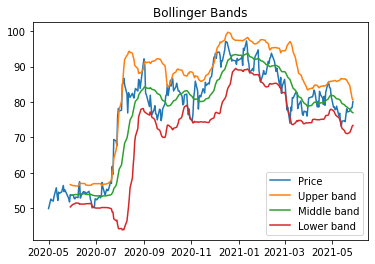

In [466]:
import matplotlib.pyplot as plt

# Plot the Bollinger Bands 
plt.plot(amd['close_price'], label='Price')
plt.plot(upper, label="Upper band")
plt.plot(mid, label='Middle band')
plt.plot(lower, label='Lower band')

# Customize and show the plot
plt.title('Bollinger Bands')
plt.legend()
plt.show()

### Feature Creation

In [467]:
amd_prices = pd.DataFrame(prices['936365']).loc['2020-05-1':'2021-05-31']
amd_prices = amd_prices.dropna()
amd_volume = pd.DataFrame(volumes['936365']).loc['2020-05-1':'2021-05-31']
amd_volume = amd_volume.dropna()
amd_prices.columns = ['close_price']
amd_volume.columns = ['volume']

In [468]:
amd_prices['volume'] = amd_volume['volume']
amd_df = amd_prices
amd_df

,close_price,volume
date,,
2020-05-01,49.88,69562.6
2020-05-04,52.56,62590.6
2020-05-05,52.19,56560.5
2020-05-06,52.16,48138.1
2020-05-07,51.95,48956.6
...,...,...
2021-05-24,77.44,33194.3
2021-05-25,77.86,47353.1
2021-05-26,78.34,30354.0


<ipython-input-469-5f2472339241>:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


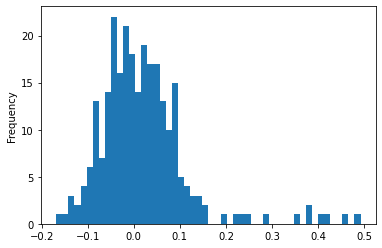

In [469]:
amd_df['10d_close_pct'] = amd_df['close_price'].pct_change(10)
amd_df['10d_close_pct'].plot.hist(bins=50)
plt.show()

In [470]:
amd_df['10d_future_close'] = amd_df['close_price'].shift(-1)
amd_df['10d_future_close_pct'] = amd_df['10d_future_close']

In [471]:
corr = amd_df.corr()
corr

,close_price,volume,10d_close_pct,10d_future_close,10d_future_close_pct
close_price,1.000000,-0.176783,0.083302,0.985512,0.985512
volume,-0.176783,1.000000,0.381450,-0.181822,-0.181822
10d_close_pct,0.083302,0.381450,1.000000,0.084748,0.084748
10d_future_close,0.985512,-0.181822,0.084748,1.000000,1.000000
10d_future_close_pct,0.985512,-0.181822,0.084748,1.000000,1.000000


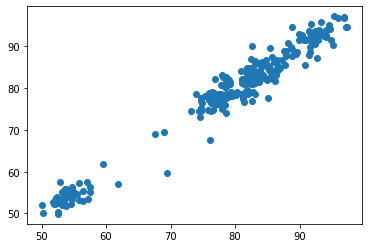

In [472]:
plt.scatter(amd_df['10d_future_close_pct'], 
         amd_df['close_price'])

### Features & Targets

In [473]:
features = amd_df[['10d_close_pct', 'volume']]
targets = amd_df['10d_future_close_pct']
type(features)

pandas.core.frame.DataFrame

In [474]:
type(targets)

pandas.core.series.Series

In [475]:
amd_df['ma200'] = ta.SMA(amd_df['close_price'].values, timeperiod = 200)
amd_df['rsi200'] = ta.RSI(amd_df['close_price'].values, timeperiod = 200)
amd_df['rsi14'] = ta.RSI(amd_df['close_price'].values, timeperiod = 200)
amd_df['ma14'] = ta.RSI(amd_df['close_price'].values, timeperiod = 200)

In [476]:
feature_names = ['10d_close_pct', 'ma200', 'rsi200','rsi14','ma14']
features = amd_df[feature_names]
targets = amd_df['10d_future_close_pct']
feature_target_df = amd_df[feature_names + ['10d_future_close_pct']]

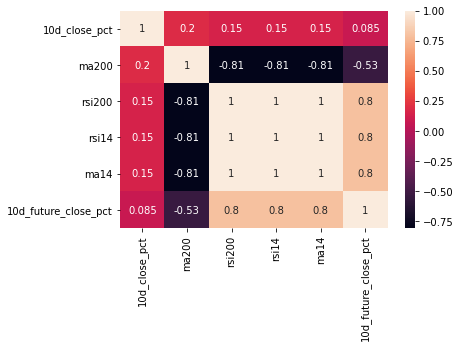

In [477]:
import seaborn as sns
corr = feature_target_df.corr()
sns.heatmap(corr, annot=True)

In [478]:
amd_df['Adj_Volume_1d_change'] = amd_df['volume'].pct_change()
one_day_change = amd_df['Adj_Volume_1d_change'].values
amd_df['Adj_Volume_1d_change_SMA'] = ta.SMA(one_day_change,    
                                               timeperiod=10)

In [479]:
print(amd_df.index.dayofweek)

Int64Index([4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
            ...
            0, 1, 2, 3, 4, 0, 1, 2, 3, 4],
           dtype='int64', name='date', length=272)


In [480]:
days_of_week = pd.get_dummies(amd_df.index.dayofweek,  
                              prefix='weekday',
                              drop_first=True)
print(days_of_week.head())

   weekday_1  weekday_2  weekday_3  weekday_4
0          0          0          0          1
1          0          0          0          0
2          1          0          0          0
3          0          1          0          0
4          0          0          1          0


## MPT

In [422]:
stocks = ['AAPL', 'AMZN', 'NFLX']

info[info["MNEM"].str.contains('|'.join(stocks), na= False)]

,Instrument,MNEM,RIC,ISIN,NAME,ESTAT
31,992816,@AAPL,AAPL.O,US0378331005,APPLE,ACT.
883,891399,@AMZN,AMZN.O,US0231351067,AMAZON.COM,ACT.
1023,15303X,@NFLX,NFLX.O,US64110L1061,NETFLIX,ACT.


In [423]:
aapl_df = pd.DataFrame(prices['992816']).loc['2012-05-1':'2021-05-31']
amzn_df = pd.DataFrame(prices['891399']).loc['2012-05-1':'2021-05-31']
nflx_df = pd.DataFrame(prices['15303X']).loc['2012-05-1':'2021-05-31']

In [424]:
aapl_df['AMZN'] = amzn_df
aapl_df['NFLX'] = nflx_df
full_df = aapl_df.rename(columns={"992816": "AAPL"})
full_df

,AAPL,AMZN,NFLX
date,,,
2012-05-01,20.7903,230.04,11.6229
2012-05-02,20.9278,230.25,11.7471
2012-05-03,20.7793,229.45,10.8529
2012-05-04,20.1875,223.99,10.4493
2012-05-07,20.3385,225.16,10.4929
...,...,...,...
2021-05-24,127.1000,3244.99,502.8999
2021-05-25,126.9000,3259.05,501.3401
2021-05-26,126.8500,3265.16,502.3601


In [425]:
# calculate daily returns of stocks
returns_daily = full_df.pct_change()

# resample the full dataframe to monthly timeframe
monthly_df = full_df.resample('BMS').first()

# calculate monthly returns of the stocks
returns_monthly = monthly_df.pct_change().dropna()
print(returns_monthly.tail())

                AAPL      AMZN      NFLX
date                                    
2021-01-01  0.054514 -0.010388  0.036228
2021-02-01  0.036550  0.049033  0.030945
2021-03-01 -0.047339 -0.058853  0.021520
2021-04-01 -0.037483  0.004723 -0.020376
2021-05-03  0.077561  0.071335 -0.056190


In [426]:
# daily covariance of stocks (for each monthly period)
covariances = {}
for i in returns_monthly.index:    
    rtd_idx = returns_daily.index
    # mask daily returns for each month (and year) & calculate covariance    
    mask = (rtd_idx.month == i.month) & (rtd_idx.year == i.year)    
    covariances[i] = returns_daily[mask].cov()

print(covariances[i])


          AAPL      AMZN      NFLX
AAPL  0.000245  0.000149  0.000155
AMZN  0.000149  0.000205  0.000149
NFLX  0.000155  0.000149  0.000195


In [427]:
for date in covariances.keys():
    cov = covariances[date]
    for single_portfolio in range(5000):    
        weights = np.random.random(3)       
        weights /= np.sum(weights)

In [428]:
portfolio_returns, portfolio_volatility, portfolio_weights = {},{},{}

# get portfolio performances at each month
for date in covariances.keys():   
    cov = covariances[date]
    for single_portfolio in range(5000):    
        weights = np.random.random(3)       
        weights /= np.sum(weights)       
        returns = np.dot(weights, returns_monthly.loc[date])   
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) 
        portfolio_returns.setdefault(date, []).append(returns)       
        portfolio_volatility.setdefault(date, []).append(volatility)  
        portfolio_weights.setdefault(date, []).append(weights)

<ipython-input-429-4f253d07942a>:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


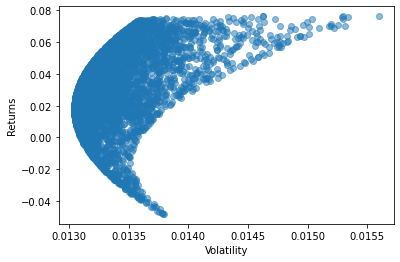

In [429]:
date = sorted(covariances.keys())[-1]
# plot efficient frontier
plt.scatter(x=portfolio_volatility[date],           
            y=portfolio_returns[date],           
            alpha=0.5)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.show()

In [430]:
# empty dictionaries for sharpe ratios and best sharpe indexes by date
sharpe_ratio, max_sharpe_idxs = {}, {}
# loop through dates and get sharpe ratio for each portfolio
for date in portfolio_returns.keys():
    for i, ret in enumerate(portfolio_returns[date]):        
        volatility = portfolio_volatility[date][i]        
        sharpe_ratio.setdefault(date,[]).append(ret / volatility)
        
        # get the index of the best sharpe ratio for each date   
        max_sharpe_idxs[date] = np.argmax(sharpe_ratio[date])

In [431]:
# calculate exponentially-weighted moving average of daily returns
ewma_daily = returns_daily.ewm(span=30).mean()

# resample daily returns to first business day of the month
ewma_monthly = ewma_daily.resample('BMS').first()

# shift ewma 1 month forward
ewma_monthly = ewma_monthly.shift(1).dropna()

In [432]:
targets, features = [], []

# create features from price history and targets as ideal portfolio
for date, ewma in ewma_monthly.iterrows():
    # get the index of the best sharpe ratio   
    best_idx = max_sharpe_idxs[date]  
    targets.append(portfolio_weights[date][best_idx])  
    features.append(ewma)

targets = np.array(targets)
features = np.array(features)

<ipython-input-433-14ef83764582>:18: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


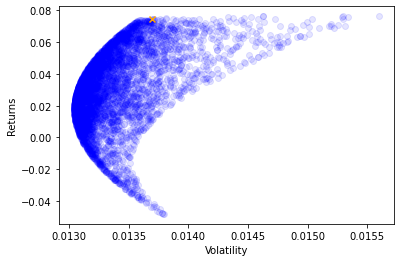

In [433]:
# latest date
date = sorted(covariances.keys())[-1]
cur_returns = portfolio_returns[date]
cur_volatility = portfolio_volatility[date]
plt.scatter(x=cur_volatility,           
            y=cur_returns,          
            alpha=0.1,          
            color='blue')

best_idx = max_sharpe_idxs[date]

plt.scatter(cur_volatility[best_idx],      
            cur_returns[best_idx],        
            marker='x',            
            color='orange')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.show()

In [434]:
# make train and test features
train_size = int(0.8 * features.shape[0])
train_features = features[:train_size]
train_targets = targets[:train_size]

test_features = features[train_size:]
test_targets = targets[train_size:]

In [435]:
print(features.shape)

(108, 3)


In [436]:
from sklearn.ensemble import RandomForestRegressor

# fit the model and check scores on train and test
rfr = RandomForestRegressor(n_estimators=300, random_state=42)
rfr.fit(train_features, train_targets)
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.8229202381916507
-0.20707728952879492


<ipython-input-438-d9f65d0af84f>:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


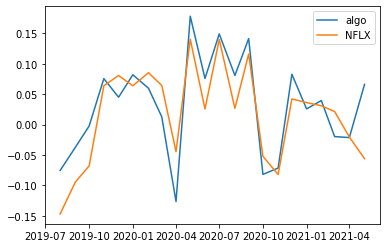

In [438]:
# get predictions from model on train and test
test_predictions = rfr.predict(test_features)
# calculate and plot returns from our RF predictions and the QQQ returns
test_returns = np.sum(returns_monthly.iloc[train_size:] * test_predictions,             
                      axis=1)
plt.plot(test_returns, label='algo')
plt.plot(returns_monthly['NFLX'].iloc[train_size:], label='NFLX')
plt.legend()
plt.show()

In [440]:
cash = 1000
algo_cash = [cash]
for r in test_returns:    
    cash *= 1 + r  
    algo_cash.append(cash)
# calculate performance for QQQ
cash = 1000# reset cash amount
nflx_cash = [cash]
for r in returns_monthly['NFLX'].iloc[train_size:]:   
    cash *= 1 + r    
    nflx_cash.append(cash)
    
print('algo returns:', (algo_cash[-1] - algo_cash[0]) / algo_cash[0])
print('NFLX returns:', (nflx_cash[-1] - nflx_cash[0]) / nflx_cash[0])

algo returns: 0.8321142700879807
NFLX returns: 0.3590762522487321


<ipython-input-441-af7b323ff3b7>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


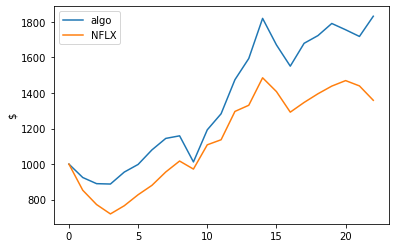

In [441]:
plt.plot(algo_cash, label='algo')
plt.plot(nflx_cash, label='NFLX')
plt.ylabel('$')
plt.legend()  # show the legend
plt.show()